In [9]:
import pandas as pd
import pickle
import time
import re
import numpy as npy
import pandas as pda
import seaborn as sbn
import matplotlib.pyplot as plot
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from tld import get_tld, is_tld
from wordcloud import WordCloud
from urllib.parse import urlparse


In [3]:
Dataset=pd.read_csv("Dataset.csv")
Dataset.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
Dataset.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [16]:
Dataset.isnull().sum()

url     0
type    0
dtype: int64

In [18]:
count = Dataset.type.value_counts()
count

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

Text(0, 0.5, 'Count')

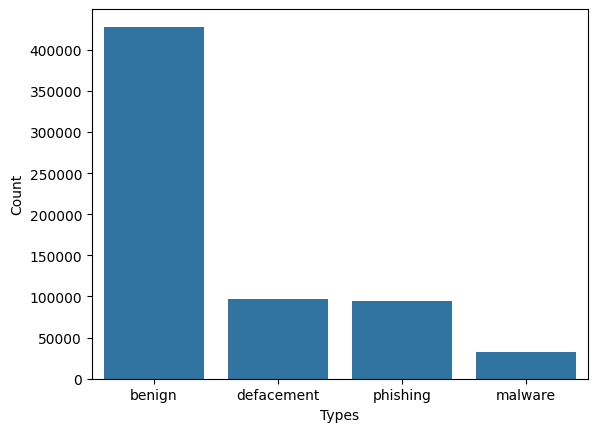

In [19]:

sbn.barplot(x=count.index, y=count)
plot.xlabel('Types')
plot.ylabel('Count')

In [9]:
#Make benign 0 and other classes as 1

rem = {"Class": {"benign":0, "defacement":1, "phishing":1, "malware":1}}
Dataset['Class'] = Dataset['type']
Dataset = Dataset.replace(rem)

Dataset.head(10)

C:\Users\JohnPeniel\AppData\Local\Temp\ipykernel_28476\1431944680.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataset = Dataset.replace(rem)


,url,type,class,Class
0,br-icloud.com.br,phishing,1,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,0


Text(0, 0.5, 'Count')

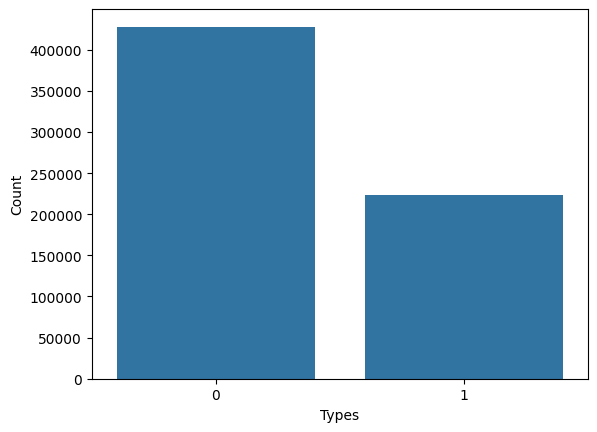

In [10]:
count = Dataset.Class.value_counts()
count

sbn.barplot(x=count.index, y=count)
plot.xlabel('Types')
plot.ylabel('Count')

In [22]:
#Extract url_length

def url_length(url):
    
    prefixes = ['http://', 'https://']
    for prefix in prefixes:
        if url.startswith(prefix):
            url = url[len(prefix):]

    
    url = url.replace('www.', '')
       
    return len(url)
Dataset['url_length'] = Dataset['url'].apply(lambda x: url_length(str(x)))

Dataset.head()

,url,type,class,url_length
0,br-icloud.com.br,phishing,1,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228


<Axes: xlabel='url_length', ylabel='count'>

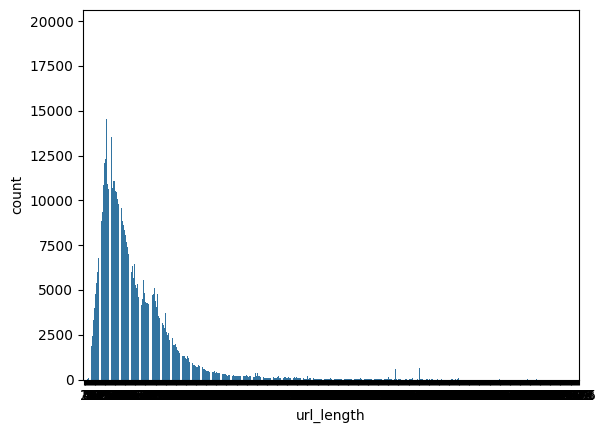

In [28]:
sbn.countplot(x='url_length', data=Dataset)

In [23]:
#Extract presence of HTTPS
def httpS(url):
    htps = urlparse(url).scheme
    match = str(htps)
    if match== 'https':
        return 1
    else:
        return 0
    
Dataset['n_https'] = Dataset['url'].apply(lambda i: httpS(i))

Dataset.head()

,url,type,class,url_length,n_https
0,br-icloud.com.br,phishing,1,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0


<Axes: xlabel='n_https', ylabel='count'>

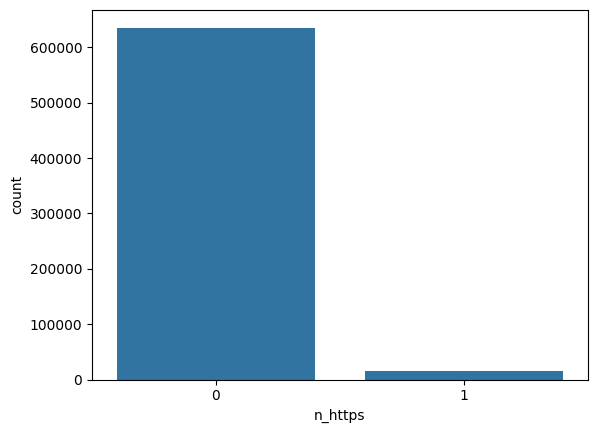

In [29]:
sbn.countplot(x='n_https', data=Dataset)

In [24]:
#Extract presence of HTTP

def http(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match== 'http':
        return 1
    else:
        return 0
    
Dataset['n_http'] = Dataset['url'].apply(lambda i: http(i))

Dataset.head()

,url,type,class,url_length,n_https,n_http
0,br-icloud.com.br,phishing,1,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1


<Axes: xlabel='n_http', ylabel='count'>

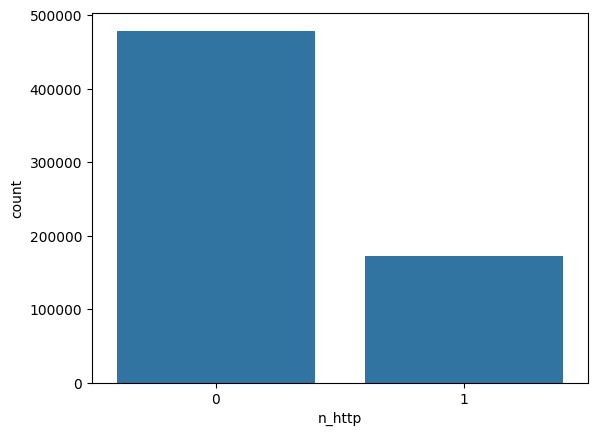

In [30]:
sbn.countplot(x='n_http', data=Dataset)

In [25]:
#Count number of digits in URL

def num_count(url):
    num = 0
    for i in url:
        if i.isnumeric():
            num = num + 1
    return num

Dataset['n_num'] = Dataset['url'].apply(lambda i: num_count(i))

Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num
0,br-icloud.com.br,phishing,1,16,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22


<Axes: xlabel='n_num', ylabel='count'>

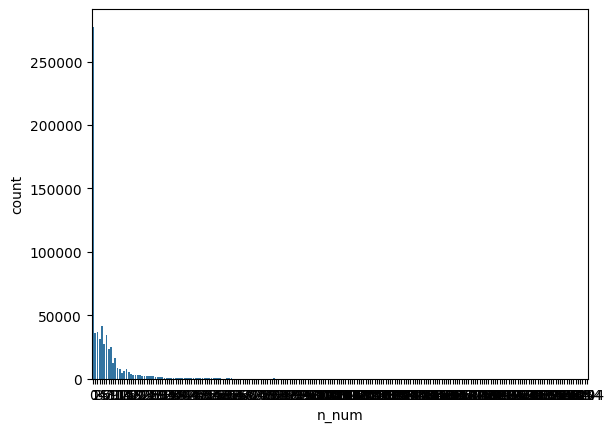

In [31]:
sbn.countplot(x='n_num', data=Dataset)

In [26]:
#Count Alphabets in URL

def count_alpha(url):
    alphas = 0
    for i in url:
        if i.isalpha():
            alphas = alphas + 1
    return alphas

Dataset['n_alpha'] = Dataset['url'].apply(lambda i: count_alpha(i))

Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha
0,br-icloud.com.br,phishing,1,16,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199


<Axes: xlabel='n_alpha', ylabel='count'>

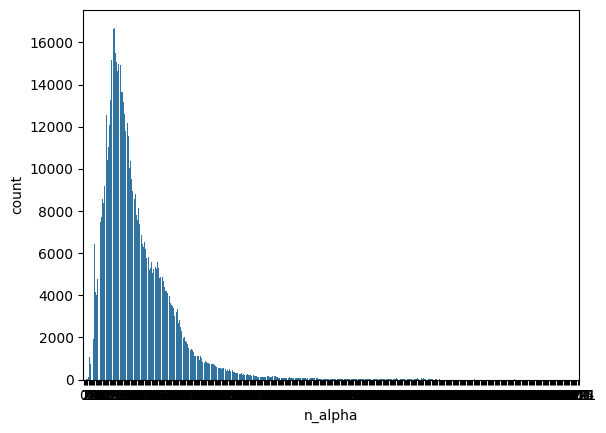

In [32]:
sbn.countplot(x='n_alpha', data=Dataset)

In [27]:
#Check if URL has IP address

def have_ip(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
    
Dataset['has_ip'] = Dataset['url'].apply(lambda i: have_ip(i))
Dataset['has_ip'].value_counts()

Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0


<Axes: xlabel='has_ip', ylabel='count'>

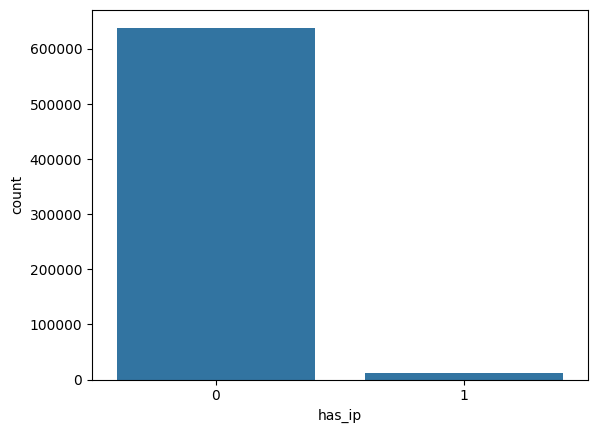

In [33]:
sbn.countplot(x='has_ip', data=Dataset)

In [34]:
#Count Special characters in URL

def count_special_characters(url):
    special_char_pattern = re.compile(r'[^a-zA-Z0-9]')

    special_characters = re.findall(special_char_pattern, url)
    
    return len(special_characters)

Dataset['n_xtr'] = Dataset['url'].apply(lambda i: count_special_characters(i))

Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14


<Axes: xlabel='n_xtr', ylabel='count'>

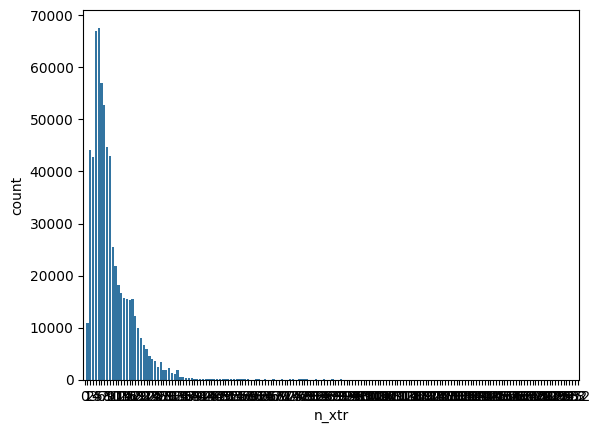

In [35]:
sbn.countplot(x='n_xtr', data=Dataset)

In [36]:
#Count number of lowercase characters

def count_lowercase(url):
   
    lowercase_count = sum(1 for char in url if char.islower())
    
    return lowercase_count

Dataset['n_lowcase'] = Dataset['url'].apply(lambda i: count_lowercase(i))

Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,136


<Axes: xlabel='n_lowcase', ylabel='count'>

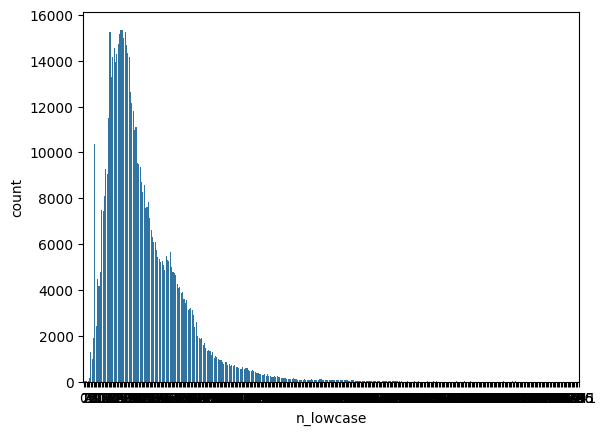

In [37]:
sbn.countplot(x='n_lowcase', data=Dataset)

In [38]:
#Count number of Uppercase characters

def count_uppercase(url):
   
    uppercase_count = sum(1 for char in url if char.isupper())
    
    return uppercase_count

Dataset['n_upcase'] = Dataset['url'].apply(lambda i: count_uppercase(i))

Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase,n_upcase
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,25,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,63,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,136,63


In [39]:
#Count the number of @ in url

def count_at_symbols(url):
    
    at_count = url.count('@')
    
    return at_count

Dataset['num_at'] = Dataset['url'].apply(lambda i: count_at_symbols(i))

Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase,n_upcase,num_at
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,25,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,63,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,136,63,0


In [41]:
#Count the number of & in url

def count_and_symbols(url):
   
    and_count = url.count('&')
    
    return and_count

Dataset['n_and'] = Dataset['url'].apply(lambda i: count_and_symbols(i))

Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase,n_upcase,num_at,n_and
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,13,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,29,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,25,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,63,0,0,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,136,63,0,2


In [42]:
#Count the number of semi-colon in url

def count_semi(url):
   
    semi_count = url.count(';')
    
    return semi_count

Dataset['n_semi'] = Dataset['url'].apply(lambda i: count_semi(i))

Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase,n_upcase,num_at,n_and,n_semi
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,13,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,29,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,25,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,63,0,0,3,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,136,63,0,2,0


In [44]:
#Count the number of // in url

def count_double_slashes(url):
    
    double_slash_count = url.count('//')
    
    return double_slash_count

Dataset['n_dbslash'] = Dataset['url'].apply(lambda i: count_double_slashes(i))

Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase,n_upcase,num_at,n_and,n_semi,n_dbslash
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,13,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,29,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,25,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,63,0,0,3,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,136,63,0,2,0,1


In [51]:
#Count number of "." in URL


def count_dots(url):
    
    dot_count = url.count('.')
    
    return dot_count

Dataset['n_dot_domain'] = Dataset['url'].apply(lambda i: count_dots(i))

Dataset.head()


Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase,n_upcase,num_at,n_and,n_semi,n_dbslash,n_dot_domain,n_hyphen_domain,n_hyphen
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,13,0,0,0,0,0,2,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,29,0,0,0,0,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,25,0,0,0,0,0,2,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,63,0,0,3,0,1,3,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,136,63,0,2,0,1,2,1,1


In [47]:
#Count number of "-" in URL


def count_hyphen(url):
    
    hyphen_count = url.count('-')
    
    return hyphen_count

Dataset['n_hyphen'] = Dataset['url'].apply(lambda i: count_hyphen(i))

Dataset.head()


,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase,n_upcase,num_at,n_and,n_semi,n_dbslash,n_dot_domain,n_hyphen_domain,n_hyphen
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,13,0,0,0,0,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,29,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,25,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,63,0,0,3,0,1,2,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,136,63,0,2,0,1,1,1,1


<Axes: xlabel='n_hyphen', ylabel='count'>

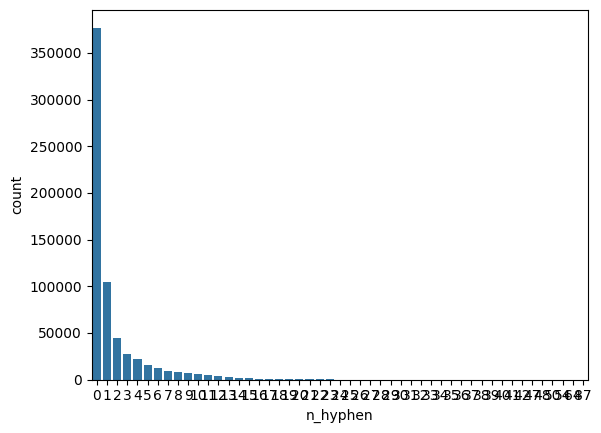

In [50]:
sbn.countplot(x='n_hyphen', data=Dataset)

In [48]:
#Count number of '-' in domain

def count_hyphen_in_domain(url):
   
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    
    hyphen_count = domain.count('-')
    
    return hyphen_count

Dataset['n_hyphen_domain'] = Dataset['url'].apply(lambda i: count_hyphen_in_domain(i))

Dataset.head()


,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase,n_upcase,num_at,n_and,n_semi,n_dbslash,n_dot_domain,n_hyphen_domain,n_hyphen
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,13,0,0,0,0,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,29,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,25,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,63,0,0,3,0,1,2,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,136,63,0,2,0,1,1,1,1


<Axes: xlabel='n_hyphen_domain', ylabel='count'>

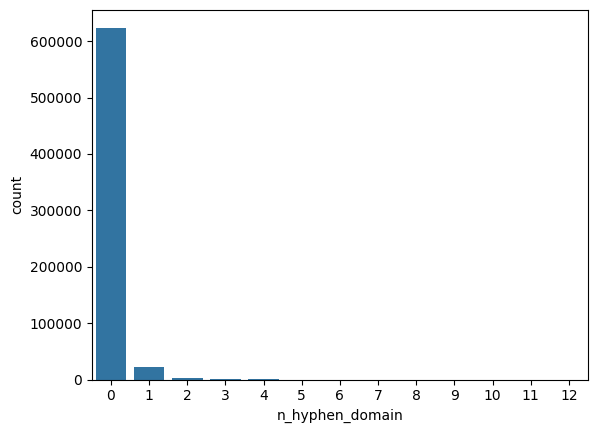

In [49]:
sbn.countplot(x='n_hyphen_domain', data=Dataset)

In [52]:
#Count length of domain in url

def domain_length(url):
   
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    
    # Calculate the length of the domain
    domain_length = len(domain)
    
    return domain_length

Dataset['domain_length'] = Dataset['url'].apply(lambda i: domain_length(i))

Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase,n_upcase,num_at,n_and,n_semi,n_dbslash,n_dot_domain,n_hyphen_domain,n_hyphen,domain_length
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,13,0,0,0,0,0,2,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,29,0,0,0,0,0,2,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,25,0,0,0,0,0,2,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,63,0,0,3,0,1,3,1,1,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,136,63,0,2,0,1,2,1,1,23


In [54]:
#Calulate ratio of numbers in url

def calculate_numbers_ratio(url):
    
    num_count = sum(1 for char in url if char.isdigit())
       
    total_chars = len(url)
        
    numbers_ratio = num_count / total_chars if total_chars > 0 else 0
    
    return numbers_ratio

Dataset['num_ratio'] = Dataset['url'].apply(lambda i: calculate_numbers_ratio(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,n_upcase,num_at,n_and,n_semi,n_dbslash,n_dot_domain,n_hyphen_domain,n_hyphen,domain_length,num_ratio
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0,0,0,0,0,2,0,1,0,0.000000
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0,0,0,0,0,2,0,0,0,0.028571
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0,0,0,0,0,2,0,0,0,0.032258
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,0,0,3,0,1,3,1,1,21,0.079545
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,63,0,2,0,1,2,1,1,23,0.093617
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,0,0,0,0,1,2,0,16,11,0.008475
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0,0,0,0,0,2,0,1,0,0.088889
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0,0,0,0,0,1,0,2,0,0.000000
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,0,0,0,0,1,2,0,1,22,0.000000
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0,0,0,0,0,1,0,4,0,0.111111


In [55]:
#Calculate ratio of alphabets in url

def calculate_alphabets_ratio(url):
    alphabet_count = sum(1 for char in url if char.isalpha())
    
    total_chars = len(url)
    
    alphabets_ratio = alphabet_count / total_chars if total_chars > 0 else 0
    
    return alphabets_ratio

Dataset['alpha_ratio'] = Dataset['url'].apply(lambda i: calculate_alphabets_ratio(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,num_at,n_and,n_semi,n_dbslash,n_dot_domain,n_hyphen_domain,n_hyphen,domain_length,num_ratio,alpha_ratio
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0,0,0,0,2,0,1,0,0.000000,0.812500
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0,0,0,0,2,0,0,0,0.028571,0.828571
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0,0,0,0,2,0,0,0,0.032258,0.806452
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,0,3,0,1,3,1,1,21,0.079545,0.715909
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,0,2,0,1,2,1,1,23,0.093617,0.846809
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,0,0,0,1,2,0,16,11,0.008475,0.788136
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0,0,0,0,2,0,1,0,0.088889,0.688889
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0,0,0,0,1,0,2,0,0.000000,0.869565
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,0,0,0,1,2,0,1,22,0.000000,0.840909
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0,0,0,0,1,0,4,0,0.111111,0.733333


In [56]:
# Calculate ratio of lowercase letters in url

def calculate_lowercase_ratio(url):
   
    lowercase_count = sum(1 for char in url if char.islower())
    
    total_chars = len(url)
    
    lowercase_ratio = lowercase_count / total_chars if total_chars > 0 else 0
    
    return lowercase_ratio

Dataset['lwcase_ratio'] = Dataset['url'].apply(lambda i: calculate_lowercase_ratio(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,n_and,n_semi,n_dbslash,n_dot_domain,n_hyphen_domain,n_hyphen,domain_length,num_ratio,alpha_ratio,lwcase_ratio
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0,0,0,2,0,1,0,0.000000,0.812500,0.812500
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0,0,0,2,0,0,0,0.028571,0.828571,0.828571
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0,0,0,2,0,0,0,0.032258,0.806452,0.806452
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,3,0,1,3,1,1,21,0.079545,0.715909,0.715909
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,2,0,1,2,1,1,23,0.093617,0.846809,0.578723
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,0,0,1,2,0,16,11,0.008475,0.788136,0.788136
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0,0,0,2,0,1,0,0.088889,0.688889,0.688889
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0,0,0,1,0,2,0,0.000000,0.869565,0.869565
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,0,0,1,2,0,1,22,0.000000,0.840909,0.840909
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0,0,0,1,0,4,0,0.111111,0.733333,0.733333


In [57]:
# Calculate ratio of upperercase letters in url

def calculate_uppercase_ratio(url):
   
    uppercase_count = sum(1 for char in url if char.isupper())
    
    total_chars = len(url)
    
    uppercase_ratio = uppercase_count / total_chars if total_chars > 0 else 0
    
    return uppercase_ratio

Dataset['upcase_ratio'] = Dataset['url'].apply(lambda i: calculate_uppercase_ratio(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,n_semi,n_dbslash,n_dot_domain,n_hyphen_domain,n_hyphen,domain_length,num_ratio,alpha_ratio,lwcase_ratio,upcase_ratio
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0,0,2,0,1,0,0.000000,0.812500,0.812500,0.000000
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0,0,2,0,0,0,0.028571,0.828571,0.828571,0.000000
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0,0,2,0,0,0,0.032258,0.806452,0.806452,0.000000
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,0,1,3,1,1,21,0.079545,0.715909,0.715909,0.000000
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,0,1,2,1,1,23,0.093617,0.846809,0.578723,0.268085
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,0,1,2,0,16,11,0.008475,0.788136,0.788136,0.000000
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0,0,2,0,1,0,0.088889,0.688889,0.688889,0.000000
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0,0,1,0,2,0,0.000000,0.869565,0.869565,0.000000
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,0,1,2,0,1,22,0.000000,0.840909,0.840909,0.000000
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0,0,1,0,4,0,0.111111,0.733333,0.733333,0.000000


In [58]:
#Calculte special character ratio in url

def calculate_special_characters_ratio(url):
    special_count = sum(1 for char in url if not char.isalnum())
    
    total_chars = len(url)
    
    special_ratio = special_count / total_chars if total_chars > 0 else 0
    
    return special_ratio

Dataset['sp_char_ratio'] = Dataset['url'].apply(lambda i: calculate_special_characters_ratio(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,n_dbslash,n_dot_domain,n_hyphen_domain,n_hyphen,domain_length,num_ratio,alpha_ratio,lwcase_ratio,upcase_ratio,sp_char_ratio
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0,2,0,1,0,0.000000,0.812500,0.812500,0.000000,0.187500
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0,2,0,0,0,0.028571,0.828571,0.828571,0.000000,0.142857
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0,2,0,0,0,0.032258,0.806452,0.806452,0.000000,0.161290
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,1,3,1,1,21,0.079545,0.715909,0.715909,0.000000,0.204545
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,1,2,1,1,23,0.093617,0.846809,0.578723,0.268085,0.059574
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,1,2,0,16,11,0.008475,0.788136,0.788136,0.000000,0.203390
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0,2,0,1,0,0.088889,0.688889,0.688889,0.000000,0.222222
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0,1,0,2,0,0.000000,0.869565,0.869565,0.000000,0.130435
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,1,2,0,1,22,0.000000,0.840909,0.840909,0.000000,0.159091
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0,1,0,4,0,0.111111,0.733333,0.733333,0.000000,0.155556


In [59]:
#Count the number of English words in url

def count_english_words(url):
    words = re.findall(r'\b[a-zA-Z]+\b', url)
    
    num_words = len(words)
    
    return num_words

Dataset['n_eng_words'] = Dataset['url'].apply(lambda i: count_english_words(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,n_dot_domain,n_hyphen_domain,n_hyphen,domain_length,num_ratio,alpha_ratio,lwcase_ratio,upcase_ratio,sp_char_ratio,n_eng_words
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,2,0,1,0,0.000000,0.812500,0.812500,0.000000,0.187500,4
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,2,0,0,0,0.028571,0.828571,0.828571,0.000000,0.142857,3
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,2,0,0,0,0.032258,0.806452,0.806452,0.000000,0.161290,5
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,3,1,1,21,0.079545,0.715909,0.715909,0.000000,0.204545,11
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,2,1,1,23,0.093617,0.846809,0.578723,0.268085,0.059574,10
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,2,0,16,11,0.008475,0.788136,0.788136,0.000000,0.203390,22
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,2,0,1,0,0.088889,0.688889,0.688889,0.000000,0.222222,8
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,1,0,2,0,0.000000,0.869565,0.869565,0.000000,0.130435,6
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,2,0,1,22,0.000000,0.840909,0.840909,0.000000,0.159091,6
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,1,0,4,0,0.111111,0.733333,0.733333,0.000000,0.155556,7


In [60]:
#Count number of random words in url

def count_random_words(url):
    random_word_pattern = re.compile(r'\b[^a-zA-Z0-9]+\b')
    
    random_words = re.findall(random_word_pattern, url)
    
    return len(random_words)

Dataset['n_rd_words'] = Dataset['url'].apply(lambda i: count_random_words(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,n_hyphen_domain,n_hyphen,domain_length,num_ratio,alpha_ratio,lwcase_ratio,upcase_ratio,sp_char_ratio,n_eng_words,n_rd_words
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0,1,0,0.000000,0.812500,0.812500,0.000000,0.187500,4,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0,0,0,0.028571,0.828571,0.828571,0.000000,0.142857,3,4
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0,0,0,0.032258,0.806452,0.806452,0.000000,0.161290,5,5
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,1,1,21,0.079545,0.715909,0.715909,0.000000,0.204545,11,14
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,1,1,23,0.093617,0.846809,0.578723,0.268085,0.059574,10,11
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,0,16,11,0.008475,0.788136,0.788136,0.000000,0.203390,22,22
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0,1,0,0.088889,0.688889,0.688889,0.000000,0.222222,8,8
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0,2,0,0.000000,0.869565,0.869565,0.000000,0.130435,6,5
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,0,1,22,0.000000,0.840909,0.840909,0.000000,0.159091,6,5
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0,4,0,0.111111,0.733333,0.733333,0.000000,0.155556,7,7


In [61]:
#Calculate average legth of English word in url

def average_word_length(url):
    # Extract consecutive sequences of alphabetic characters as words
    words = re.findall(r'\b[a-zA-Z]+\b', url)
    
    # Calculate the average word length
    avg_word_length = sum(len(word) for word in words) / len(words) if len(words) > 0 else 0
    
    return avg_word_length

Dataset['avg_wd_len'] = Dataset['url'].apply(lambda i: average_word_length(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,n_hyphen,domain_length,num_ratio,alpha_ratio,lwcase_ratio,upcase_ratio,sp_char_ratio,n_eng_words,n_rd_words,avg_wd_len
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,1,0,0.000000,0.812500,0.812500,0.000000,0.187500,4,3,3.250000
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0,0,0.028571,0.828571,0.828571,0.000000,0.142857,3,4,4.000000
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0,0,0.032258,0.806452,0.806452,0.000000,0.161290,5,5,5.000000
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,1,21,0.079545,0.715909,0.715909,0.000000,0.204545,11,14,4.454545
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,1,23,0.093617,0.846809,0.578723,0.268085,0.059574,10,11,5.600000
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,16,11,0.008475,0.788136,0.788136,0.000000,0.203390,22,22,4.227273
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,1,0,0.088889,0.688889,0.688889,0.000000,0.222222,8,8,3.875000
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,2,0,0.000000,0.869565,0.869565,0.000000,0.130435,6,5,6.666667
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,1,22,0.000000,0.840909,0.840909,0.000000,0.159091,6,5,6.166667
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,4,0,0.111111,0.733333,0.733333,0.000000,0.155556,7,7,4.571429


In [62]:
#Calculate average length of random words in url

def average_random_word_length(url):
    random_word_pattern = re.compile(r'\b[^a-zA-Z0-9]+\b')
    
    random_words = re.findall(random_word_pattern, url)
    
    avg_random_word_length = sum(len(word) for word in random_words) / len(random_words) if len(random_words) > 0 else 0
    
    return avg_random_word_length

Dataset['avg_rd_wd_len'] = Dataset['url'].apply(lambda i: average_random_word_length(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,domain_length,num_ratio,alpha_ratio,lwcase_ratio,upcase_ratio,sp_char_ratio,n_eng_words,n_rd_words,avg_wd_len,avg_rd_wd_len
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0,0.000000,0.812500,0.812500,0.000000,0.187500,4,3,3.250000,1.000000
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0,0.028571,0.828571,0.828571,0.000000,0.142857,3,4,4.000000,1.000000
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0,0.032258,0.806452,0.806452,0.000000,0.161290,5,5,5.000000,1.000000
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,21,0.079545,0.715909,0.715909,0.000000,0.204545,11,14,4.454545,1.142857
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,23,0.093617,0.846809,0.578723,0.268085,0.059574,10,11,5.600000,1.181818
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,11,0.008475,0.788136,0.788136,0.000000,0.203390,22,22,4.227273,1.090909
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0,0.088889,0.688889,0.688889,0.000000,0.222222,8,8,3.875000,1.250000
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0,0.000000,0.869565,0.869565,0.000000,0.130435,6,5,6.666667,1.200000
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,22,0.000000,0.840909,0.840909,0.000000,0.159091,6,5,6.166667,1.400000
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0,0.111111,0.733333,0.733333,0.000000,0.155556,7,7,4.571429,1.000000


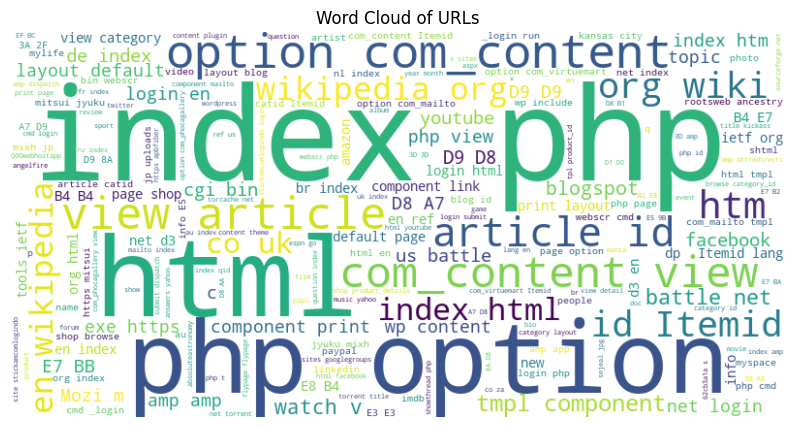

In [75]:
#Wordcloud to see the common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(Dataset['url']))
plot.figure(figsize=(10, 6))
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis('off')
plot.title('Word Cloud of URLs')
plot.show()

In [63]:
#Check for shortened services in URL

def has_shortening_service(url):
    pattern = re.compile(r'https?://(?:www\.)?(?:\w+\.)*(\w+)\.\w+')
    match = pattern.search(url)
    
    if match:
        domain = match.group(1)
        common_shortening_services = ['bit', 'goo', 'tinyurl', 'ow', 't', 'is',
                                      'cli', 'yfrog', 'migre', 'ff', 'url4', 'twit',
                                      'su', 'snipurl', 'short', 'BudURL', 'ping', 
                                      'post', 'Just', 'bkite', 'snipr', 'fic', 
                                      'loopt', 'doiop', 'short', 'kl', 'wp', 
                                      'rubyurl', 'om', 'to', 'bit', 't', 'lnkd', 
                                      'db', 'qr', 'adf', 'goo', 'bitly', 'cur', 
                                      'tinyurl', 'ow', 'bit', 'ity', 'q', 'is', 
                                      'po', 'bc', 'twitthis', 'u', 'j', 'buzurl', 
                                      'cutt', 'u', 'yourls', 'x', 'prettylinkpro', 
                                      'scrnch', 'filoops', 'vzturl', 'qr', '1url', 
                                      'tweez', 'v', 'tr', 'link', 'zip']
        
        if domain.lower() in common_shortening_services:
            return 1
    return 0

Dataset['shortened']  = Dataset['url'].apply(lambda x: has_shortening_service(x))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,num_ratio,alpha_ratio,lwcase_ratio,upcase_ratio,sp_char_ratio,n_eng_words,n_rd_words,avg_wd_len,avg_rd_wd_len,shortened
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0.000000,0.812500,0.812500,0.000000,0.187500,4,3,3.250000,1.000000,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0.028571,0.828571,0.828571,0.000000,0.142857,3,4,4.000000,1.000000,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0.032258,0.806452,0.806452,0.000000,0.161290,5,5,5.000000,1.000000,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,0.079545,0.715909,0.715909,0.000000,0.204545,11,14,4.454545,1.142857,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,0.093617,0.846809,0.578723,0.268085,0.059574,10,11,5.600000,1.181818,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,0.008475,0.788136,0.788136,0.000000,0.203390,22,22,4.227273,1.090909,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0.088889,0.688889,0.688889,0.000000,0.222222,8,8,3.875000,1.250000,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0.000000,0.869565,0.869565,0.000000,0.130435,6,5,6.666667,1.200000,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,0.000000,0.840909,0.840909,0.000000,0.159091,6,5,6.166667,1.400000,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0.111111,0.733333,0.733333,0.000000,0.155556,7,7,4.571429,1.000000,0


In [64]:
#Count number of . in url

def count_dot(url):
    count_dot = url.count('.')
    return count_dot
Dataset['n_dot'] = Dataset['url'].apply(lambda i: count_dot(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,alpha_ratio,lwcase_ratio,upcase_ratio,sp_char_ratio,n_eng_words,n_rd_words,avg_wd_len,avg_rd_wd_len,shortened,n_dot
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0.812500,0.812500,0.000000,0.187500,4,3,3.250000,1.000000,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0.828571,0.828571,0.000000,0.142857,3,4,4.000000,1.000000,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0.806452,0.806452,0.000000,0.161290,5,5,5.000000,1.000000,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,0.715909,0.715909,0.000000,0.204545,11,14,4.454545,1.142857,0,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,0.846809,0.578723,0.268085,0.059574,10,11,5.600000,1.181818,0,2
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,0.788136,0.788136,0.000000,0.203390,22,22,4.227273,1.090909,0,2
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0.688889,0.688889,0.000000,0.222222,8,8,3.875000,1.250000,0,2
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0.869565,0.869565,0.000000,0.130435,6,5,6.666667,1.200000,0,1
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,0.840909,0.840909,0.000000,0.159091,6,5,6.166667,1.400000,0,2
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0.733333,0.733333,0.000000,0.155556,7,7,4.571429,1.000000,0,1


In [65]:
#Count www in url

def count_www(url):
    url.count('www')
    return url.count('www')
Dataset['n_www'] = Dataset['url'].apply(lambda i: count_www(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,lwcase_ratio,upcase_ratio,sp_char_ratio,n_eng_words,n_rd_words,avg_wd_len,avg_rd_wd_len,shortened,n_dot,n_www
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0.812500,0.000000,0.187500,4,3,3.250000,1.000000,0,2,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0.828571,0.000000,0.142857,3,4,4.000000,1.000000,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0.806452,0.000000,0.161290,5,5,5.000000,1.000000,0,2,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,0.715909,0.000000,0.204545,11,14,4.454545,1.142857,0,3,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,0.578723,0.268085,0.059574,10,11,5.600000,1.181818,0,2,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,0.788136,0.000000,0.203390,22,22,4.227273,1.090909,0,2,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0.688889,0.000000,0.222222,8,8,3.875000,1.250000,0,2,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0.869565,0.000000,0.130435,6,5,6.666667,1.200000,0,1,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,0.840909,0.000000,0.159091,6,5,6.166667,1.400000,0,2,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0.733333,0.000000,0.155556,7,7,4.571429,1.000000,0,1,0


In [66]:
#Count number of DIR in URL. the '/' comes before each directory

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
Dataset['n_slash'] = Dataset['url'].apply(lambda i: no_of_dir(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,upcase_ratio,sp_char_ratio,n_eng_words,n_rd_words,avg_wd_len,avg_rd_wd_len,shortened,n_dot,n_www,n_slash
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0.000000,0.187500,4,3,3.250000,1.000000,0,2,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0.000000,0.142857,3,4,4.000000,1.000000,0,2,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0.000000,0.161290,5,5,5.000000,1.000000,0,2,0,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,0.000000,0.204545,11,14,4.454545,1.142857,0,3,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,0.268085,0.059574,10,11,5.600000,1.181818,0,2,0,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,0.000000,0.203390,22,22,4.227273,1.090909,0,2,0,3
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0.000000,0.222222,8,8,3.875000,1.250000,0,2,0,6
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0.000000,0.130435,6,5,6.666667,1.200000,0,1,0,1
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,0.000000,0.159091,6,5,6.166667,1.400000,0,2,1,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0.000000,0.155556,7,7,4.571429,1.000000,0,1,0,2


In [67]:
#Count the number of % in URL

def count_per(url):
    return url.count('%')
Dataset['n_per'] = Dataset['url'].apply(lambda i : count_per(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,sp_char_ratio,n_eng_words,n_rd_words,avg_wd_len,avg_rd_wd_len,shortened,n_dot,n_www,n_slash,n_per
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,0.187500,4,3,3.250000,1.000000,0,2,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,0.142857,3,4,4.000000,1.000000,0,2,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,0.161290,5,5,5.000000,1.000000,0,2,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,0.204545,11,14,4.454545,1.142857,0,3,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,0.059574,10,11,5.600000,1.181818,0,2,0,1,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,0.203390,22,22,4.227273,1.090909,0,2,0,3,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,0.222222,8,8,3.875000,1.250000,0,2,0,6,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,0.130435,6,5,6.666667,1.200000,0,1,0,1,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,0.159091,6,5,6.166667,1.400000,0,2,1,1,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,0.155556,7,7,4.571429,1.000000,0,1,0,2,0


In [68]:
#Count ? marks in URL
def count_ques(url):
    return url.count('?')
Dataset['n_quest'] = Dataset['url'].apply(lambda i: count_ques(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,n_eng_words,n_rd_words,avg_wd_len,avg_rd_wd_len,shortened,n_dot,n_www,n_slash,n_per,n_quest
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,4,3,3.250000,1.000000,0,2,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,3,4,4.000000,1.000000,0,2,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,5,5,5.000000,1.000000,0,2,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,11,14,4.454545,1.142857,0,3,1,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,10,11,5.600000,1.181818,0,2,0,1,0,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,22,22,4.227273,1.090909,0,2,0,3,0,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,8,8,3.875000,1.250000,0,2,0,6,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,6,5,6.666667,1.200000,0,1,0,1,0,1
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,6,5,6.166667,1.400000,0,2,1,1,0,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,7,7,4.571429,1.000000,0,1,0,2,0,0


In [69]:
#Count = signs in URL

def count_equal(url):
    return url.count('=')
Dataset['n_equal'] = Dataset['url'].apply(lambda i: count_equal(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,n_rd_words,avg_wd_len,avg_rd_wd_len,shortened,n_dot,n_www,n_slash,n_per,n_quest,n_equal
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,3,3.250000,1.000000,0,2,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,4,4.000000,1.000000,0,2,0,2,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,5,5.000000,1.000000,0,2,0,3,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,14,4.454545,1.142857,0,3,1,1,0,1,4
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,11,5.600000,1.181818,0,2,0,1,0,1,3
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,22,4.227273,1.090909,0,2,0,3,0,0,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,8,3.875000,1.250000,0,2,0,6,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,5,6.666667,1.200000,0,1,0,1,0,1,1
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,5,6.166667,1.400000,0,2,1,1,0,0,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,7,4.571429,1.000000,0,1,0,2,0,0,0


In [70]:
def count_consonants(url):
    # Convert the URL to lowercase for case-insensitive counting
    url_lower = url.lower()
    
    # Define a set of vowels
    vowels = set("aeiou")
    
    # Count the number of consonants
    num_consonants = sum(1 for char in url_lower if char.isalpha() and char not in vowels)
    
    return num_consonants

Dataset['n_consonant'] = Dataset['url'].apply(lambda i: count_consonants(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,avg_wd_len,avg_rd_wd_len,shortened,n_dot,n_www,n_slash,n_per,n_quest,n_equal,n_consonant
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,3.250000,1.000000,0,2,0,0,0,0,0,9
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,4.000000,1.000000,0,2,0,2,0,0,0,20
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,5.000000,1.000000,0,2,0,3,0,0,0,19
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,4.454545,1.142857,0,3,1,1,0,1,4,41
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,5.600000,1.181818,0,2,0,1,0,1,3,162
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,4.227273,1.090909,0,2,0,3,0,0,0,55
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,3.875000,1.250000,0,2,0,6,0,0,0,21
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,6.666667,1.200000,0,1,0,1,0,1,1,25
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,6.166667,1.400000,0,2,1,1,0,0,0,25
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,4.571429,1.000000,0,1,0,2,0,0,0,22


In [71]:
def count_vowels(url):
    # Convert the URL to lowercase for case-insensitive counting
    url_lower = url.lower()
    
    # Define a set of vowels
    vowels = set("aeiou")
    
    # Count the number of vowels
    num_vowels = sum(1 for char in url_lower if char.isalpha() and char in vowels)
    
    return num_vowels

Dataset['n_vowel'] = Dataset['url'].apply(lambda i: count_vowels(i))

Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,avg_rd_wd_len,shortened,n_dot,n_www,n_slash,n_per,n_quest,n_equal,n_consonant,n_vowel
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,1.000000,0,2,0,0,0,0,0,9,4
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,1.000000,0,2,0,2,0,0,0,20,9
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,1.000000,0,2,0,3,0,0,0,19,6
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,1.142857,0,3,1,1,0,1,4,41,22
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,1.181818,0,2,0,1,0,1,3,162,37
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,1.090909,0,2,0,3,0,0,0,55,38
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,1.250000,0,2,0,6,0,0,0,21,10
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,1.200000,0,1,0,1,0,1,1,25,15
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,1.400000,0,2,1,1,0,0,0,25,12
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,1.000000,0,1,0,2,0,0,0,22,11


In [72]:
Dataset.describe()

,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase,n_upcase,...,avg_rd_wd_len,shortened,n_dot,n_www,n_slash,n_per,n_quest,n_equal,n_consonant,n_vowel
count,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,...,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000
mean,0.342585,57.347912,0.024079,0.264618,5.527409,45.247104,0.019177,9.399365,42.901573,2.333065,...,1.075793,0.000260,2.195453,0.195379,2.317042,0.519502,0.223782,0.603863,29.992452,15.254652
std,0.474574,43.460757,0.153294,0.441130,11.700814,31.624502,0.137147,8.100013,27.897556,8.723466,...,0.135865,0.016108,1.490732,0.402825,1.566924,4.462254,0.441220,1.516960,22.281763,10.264710
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,0.000000,0.000000,0.000000,25.000000,0.000000,4.000000,24.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,8.000000
50%,0.000000,45.000000,0.000000,0.000000,2.000000,37.000000,0.000000,7.000000,35.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,24.000000,13.000000
75%,1.000000,73.000000,0.000000,1.000000,7.000000,58.000000,0.000000,12.000000,56.000000,1.000000,...,1.133333,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,38.000000,20.000000
max,1.000000,2175.000000,1.000000,1.000000,1204.000000,2141.000000,1.000000,372.000000,2141.000000,649.000000,...,20.923077,1.000000,42.000000,5.000000,39.000000,231.000000,20.000000,51.000000,1810.000000,636.000000


In [74]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   url              651191 non-null  object 
 1   type             651191 non-null  object 
 2   class            651191 non-null  int64  
 3   url_length       651191 non-null  int64  
 4   n_https          651191 non-null  int64  
 5   n_http           651191 non-null  int64  
 6   n_num            651191 non-null  int64  
 7   n_alpha          651191 non-null  int64  
 8   has_ip           651191 non-null  int64  
 9   n_xtr            651191 non-null  int64  
 10  n_lowcase        651191 non-null  int64  
 11  n_upcase         651191 non-null  int64  
 12  num_at           651191 non-null  int64  
 13  n_and            651191 non-null  int64  
 14  n_semi           651191 non-null  int64  
 15  n_dbslash        651191 non-null  int64  
 16  n_dot_domain     651191 non-null  int6

In [73]:
Dataset.isnull().sum()

url                0
type               0
class              0
url_length         0
n_https            0
n_http             0
n_num              0
n_alpha            0
has_ip             0
n_xtr              0
n_lowcase          0
n_upcase           0
num_at             0
n_and              0
n_semi             0
n_dbslash          0
n_dot_domain       0
n_hyphen_domain    0
n_hyphen           0
domain_length      0
num_ratio          0
alpha_ratio        0
lwcase_ratio       0
upcase_ratio       0
sp_char_ratio      0
n_eng_words        0
n_rd_words         0
avg_wd_len         0
avg_rd_wd_len      0
shortened          0
n_dot              0
n_www              0
n_slash            0
n_per              0
n_quest            0
n_equal            0
n_consonant        0
n_vowel            0
dtype: int64

In [10]:
Dataset=pd.read_csv("FeaturesDataset.csv")
Dataset.head()

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,avg_rd_wd_len,shortened,n_dot,n_www,n_slash,n_per,n_quest,n_equal,n_consonant,n_vowel
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,1.000000,0,2,0,0,0,0,0,9,4
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,1.000000,0,2,0,2,0,0,0,20,9
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,1.000000,0,2,0,3,0,0,0,19,6
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,1.142857,0,3,1,1,0,1,4,41,22
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,1.181818,0,2,0,1,0,1,3,162,37


In [11]:
Dataset.shape


(641125, 38)

In [12]:
Dataset.duplicated().sum()

0

In [79]:
Dataset.drop_duplicates(inplace=True)

In [80]:
Dataset.duplicated().sum()

0

In [13]:
Dataset.columns

Index(['url', 'type', 'class', 'url_length', 'n_https', 'n_http', 'n_num',
       'n_alpha', 'has_ip', 'n_xtr', 'n_lowcase', 'n_upcase', 'num_at',
       'n_and', 'n_semi', 'n_dbslash', 'n_dot_domain', 'n_hyphen',
       'n_hyphen_domain', 'domain_length', 'num_ratio', 'alpha_ratio',
       'lwcase_ratio', 'upcase_ratio', 'sp_char_ratio', 'n_eng_words',
       'n_rd_words', 'avg_wd_len', 'avg_rd_wd_len', 'shortened', 'n_dot',
       'n_www', 'n_slash', 'n_per', 'n_quest', 'n_equal', 'n_consonant',
       'n_vowel'],
      dtype='object')

In [82]:
#Save dataset and extracted features

csv_filename = 'URLFeaturesDataset.csv'
Dataset.to_csv(csv_filename, index=False)

In [4]:
Dataset=pd.read_csv("URLFeaturesDataset.csv")

In [14]:
Dataset.head(10)

,url,type,class,url_length,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,...,avg_rd_wd_len,shortened,n_dot,n_www,n_slash,n_per,n_quest,n_equal,n_consonant,n_vowel
0,br-icloud.com.br,phishing,1,16,0,0,0,13,0,3,...,1.000000,0,2,0,0,0,0,0,9,4
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,1,29,0,5,...,1.000000,0,2,0,2,0,0,0,20,9
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,1,25,0,5,...,1.000000,0,2,0,3,0,0,0,19,6
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,77,0,1,7,63,0,18,...,1.142857,0,3,1,1,0,1,4,41,22
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,228,0,1,22,199,0,14,...,1.181818,0,2,0,1,0,1,3,162,37
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,111,0,1,1,93,0,24,...,1.090909,0,2,0,3,0,0,0,55,38
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,4,31,0,10,...,1.250000,0,2,0,6,0,0,0,21,10
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,0,0,40,0,6,...,1.200000,0,1,0,1,0,1,1,25,15
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,33,0,1,0,37,0,7,...,1.400000,0,2,1,1,0,0,0,25,12
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,5,33,0,7,...,1.000000,0,1,0,2,0,0,0,22,11


<Axes: >

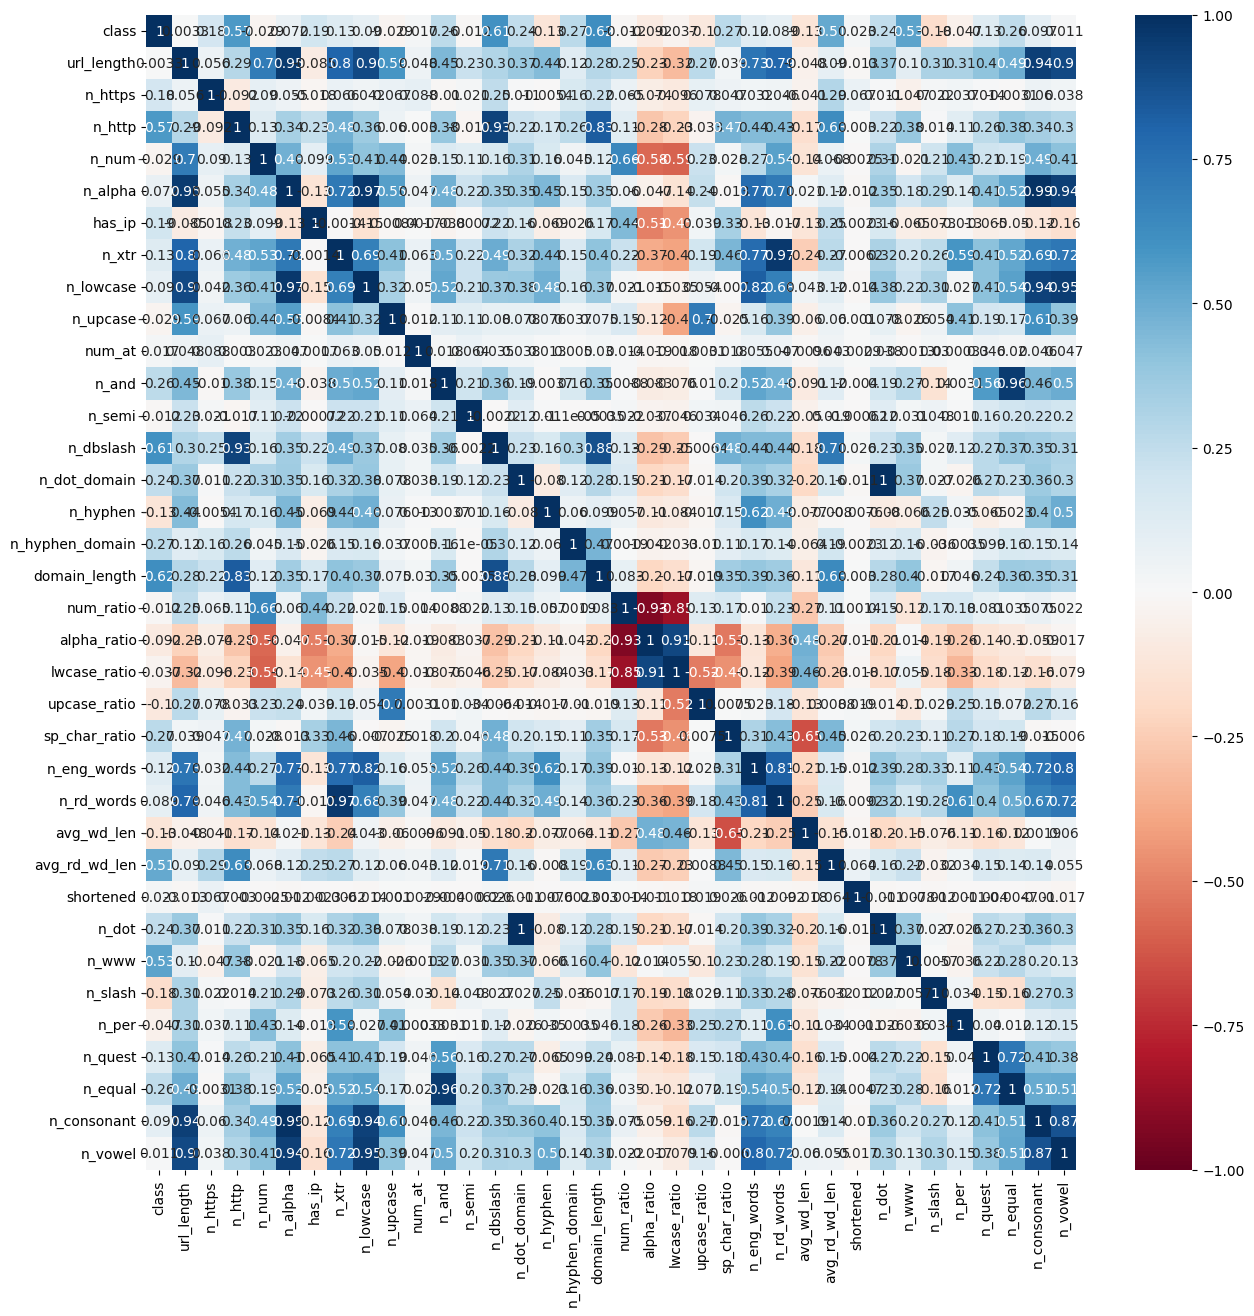

In [15]:
df = Dataset.drop(['url','type'],axis=1)
corr = df.corr()

plot.figure(figsize=(15, 15))
sbn.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,1:37]  #independent columns
y = df.iloc[:,0]    #target column i.e class
#apply SelectKBest class to extract the features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pda.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pda.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(37,'Score'))  # the features to see their scores


           Features         Score
16    domain_length  4.033305e+06
12        n_dbslash  1.759178e+05
10            n_and  1.728020e+05
32          n_equal  1.575306e+05
2            n_http  1.559851e+05
28            n_www  1.507515e+05
33      n_consonant  1.009312e+05
7         n_lowcase  9.432444e+04
4           n_alpha  7.405836e+04
6             n_xtr  7.380829e+04
14         n_hyphen  6.343854e+04
15  n_hyphen_domain  6.298589e+04
30            n_per  6.296277e+04
13     n_dot_domain  3.833500e+04
27            n_dot  3.833500e+04
23       n_rd_words  3.025815e+04
22      n_eng_words  2.650453e+04
5            has_ip  2.385777e+04
29          n_slash  2.135270e+04
1           n_https  2.077962e+04
8          n_upcase  1.751916e+04
3             n_num  1.335166e+04
31          n_quest  9.593992e+03
24       avg_wd_len  5.018835e+03
25    avg_rd_wd_len  2.880675e+03
20     upcase_ratio  8.079135e+02
11           n_semi  7.459507e+02
21    sp_char_ratio  5.934628e+02
34          n_

In [17]:
X = df.drop(['class','shortened','num_at','alpha_ratio','lwcase_ratio','num_ratio','sp_char_ratio','n_semi','upcase_ratio','n_vowel','url_length'], axis=1)
y = df['class']

In [18]:
X.head(10)

,n_https,n_http,n_num,n_alpha,has_ip,n_xtr,n_lowcase,n_upcase,n_and,n_dbslash,...,n_rd_words,avg_wd_len,avg_rd_wd_len,n_dot,n_www,n_slash,n_per,n_quest,n_equal,n_consonant
0,0,0,0,13,0,3,13,0,0,0,...,3,3.250000,1.000000,2,0,0,0,0,0,9
1,0,0,1,29,0,5,29,0,0,0,...,4,4.000000,1.000000,2,0,2,0,0,0,20
2,0,0,1,25,0,5,25,0,0,0,...,5,5.000000,1.000000,2,0,3,0,0,0,19
3,0,1,7,63,0,18,63,0,3,1,...,14,4.454545,1.142857,3,1,1,0,1,4,41
4,0,1,22,199,0,14,136,63,2,1,...,11,5.600000,1.181818,2,0,1,0,1,3,162
5,0,1,1,93,0,24,93,0,0,1,...,22,4.227273,1.090909,2,0,3,0,0,0,55
6,0,0,4,31,0,10,31,0,0,0,...,8,3.875000,1.250000,2,0,6,0,0,0,21
7,0,0,0,40,0,6,40,0,0,0,...,5,6.666667,1.200000,1,0,1,0,1,1,25
8,0,1,0,37,0,7,37,0,0,1,...,5,6.166667,1.400000,2,1,1,0,0,0,25
9,0,0,5,33,0,7,33,0,0,0,...,7,4.571429,1.000000,1,0,2,0,0,0,22


In [19]:
X = X.values
y = y.values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
X_test.shape

(128225, 25)

In [24]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=50)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     85461
           1       0.97      0.95      0.96     42764

    accuracy                           0.97    128225
   macro avg       0.97      0.97      0.97    128225
weighted avg       0.97      0.97      0.97    128225



Accuracy: 0.9718619613959836
Sensitivity: 0.9841331133499491
Specificity: 0.9473388831727622
Kappa: 0.47859532830779694
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     85461
           1       0.97      0.95      0.96     42764

    accuracy                           0.97    128225
   macro avg       0.97      0.97      0.97    128225
weighted avg       0.97      0.97      0.97    128225



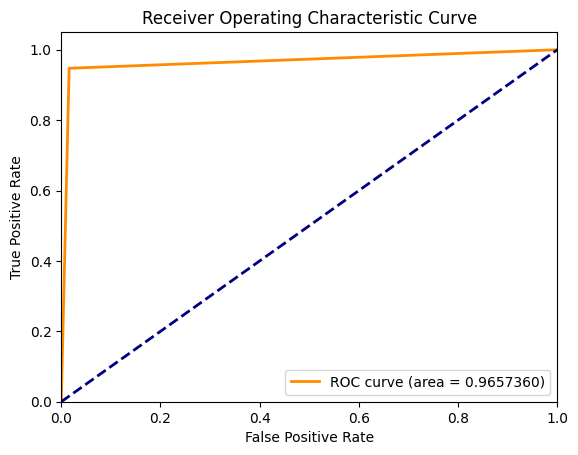

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=50)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
kappa = (accuracy_score(y_test, y_pred) + accuracy_score(y_test, y_pred) - 1)/(1 + accuracy_score(y_test, y_pred))

print(f"Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Kappa:", kappa)
print("Classification Report:\n", report)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plot.figure()
plot.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.7f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver Operating Characteristic Curve')
plot.legend(loc="lower right")
plot.show()


#############################################
######-Model => DecisionTreeClassifier 
Test Accuracy :  96.35%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85461
           1       0.95      0.94      0.94     42764

    accuracy                           0.96    128225
   macro avg       0.96      0.96      0.96    128225
weighted avg       0.96      0.96      0.96    128225

             Confusion_matrix 


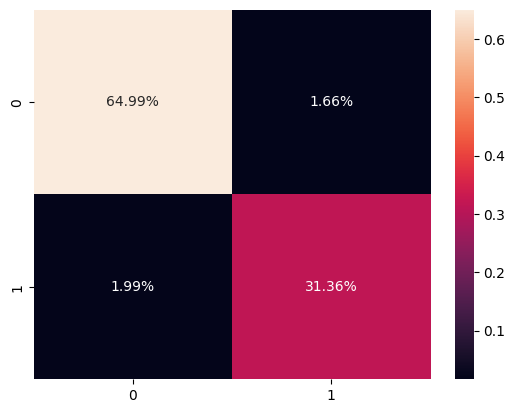

###################- End -###################
#############################################
######-Model => RandomForestClassifier 
Test Accuracy :  97.19%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85461
           1       0.97      0.95      0.96     42764

    accuracy                           0.97    128225
   macro avg       0.97      0.97      0.97    128225
weighted avg       0.97      0.97      0.97    128225

             Confusion_matrix 


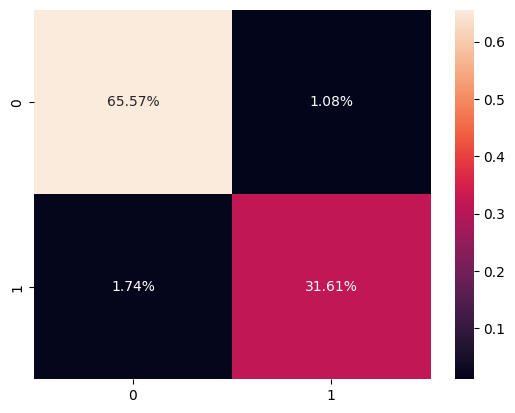

###################- End -###################
#############################################
######-Model => ExtraTreesClassifier 
Test Accuracy :  97.14%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85461
           1       0.97      0.95      0.96     42764

    accuracy                           0.97    128225
   macro avg       0.97      0.97      0.97    128225
weighted avg       0.97      0.97      0.97    128225

             Confusion_matrix 


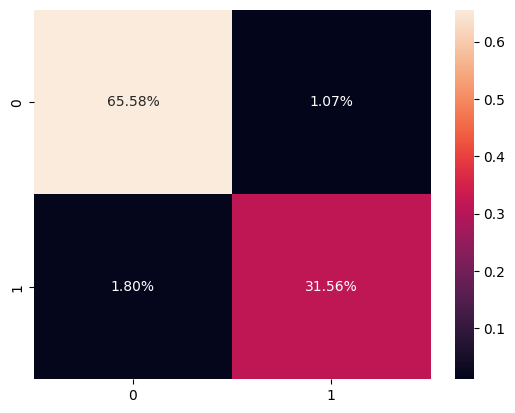

###################- End -###################
#############################################
######-Model => GradientBoostingClassifier 
Test Accuracy :  95.89%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85461
           1       0.96      0.92      0.94     42764

    accuracy                           0.96    128225
   macro avg       0.96      0.95      0.95    128225
weighted avg       0.96      0.96      0.96    128225

             Confusion_matrix 


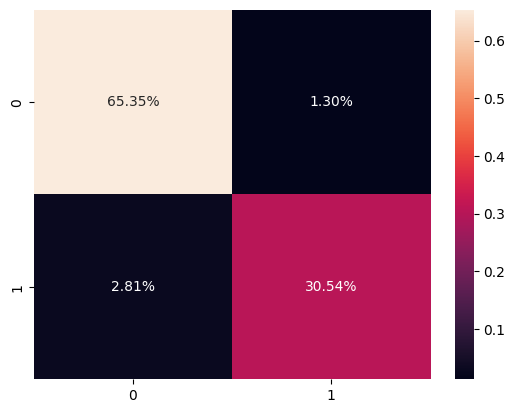

###################- End -###################

Best Model: RandomForestClassifier


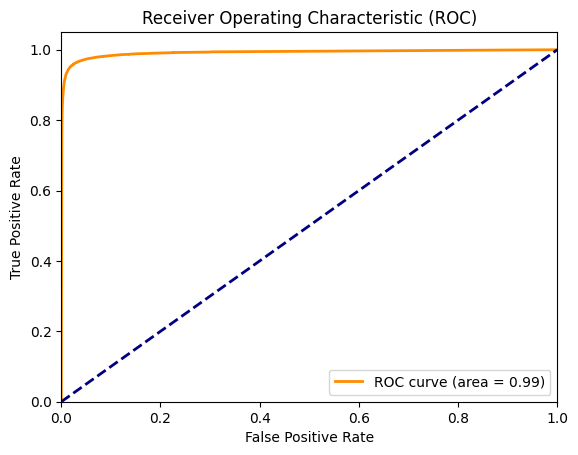

In [30]:
import pickle
from sklearn.metrics import roc_curve, auc



models = [DecisionTreeClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier]
accuracy_test = []
best_model = None
best_accuracy = 0

for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m.__name__))  # Display model name
    
    model_ = m()
    model_.fit(X_train, y_train)
    
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sbn.heatmap(cf_matrix/npy.sum(cf_matrix), annot=True, fmt='0.2%')
    plot.show()
    print('\033[31m###################- End -###################\033[0m')
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model_

# Plot ROC curve for the best performing model
if best_model is not None:
    print('\nBest Model: {}'.format(best_model.__name__ if hasattr(best_model, '__name__') else best_model.__class__.__name__))

    # Compute ROC curve
    y_score = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plot.figure()
    plot.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plot.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plot.xlim([0.0, 1.0])
    plot.ylim([0.0, 1.05])
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.title('Receiver Operating Characteristic (ROC)')
    plot.legend(loc='lower right')
    plot.show()

    # Save the best model as a pickle file
    with open('model2.pkl', 'wb') as model_file:
        pickle.dump(best_model, model_file)


In [ ]:
#****************************************TESTING THE MODEL FOR PREDICTION*******************************************************TEST MODEL URL PREDICTION********************************************

In [56]:
def load_model(model_filename):
    with open(model_filename, 'rb') as model_file:
        model = pickle.load(model_file)
    return model

start_time = time.time()
#Feature extraction
def extract_url_features(url):

    #Extract url_length

    def urllength(url):
        
        prefixes = ['http://', 'https://']
        for prefix in prefixes:
            if url.startswith(prefix):
                url = url[len(prefix):]
        
        url = url.replace('www.', '')
        
        return len(url)
    url_length = urllength(url)


    #Extract presence of HTTPS
    def httpS(url):
        htps = urlparse(url).scheme
        match = str(htps)
        if match== 'https':
            return 1
        else:
            return 0
    n_https = httpS(url)


    #Extract presence of HTTP

    def http(url):
        htp = urlparse(url).scheme
        match = str(htp)
        if match== 'http':
            return 1
        else:
            return 0
        
    n_http= http(url)

    
    #Count number of digits in URL

    def num_count(url):
        num = 0
        for i in url:
            if i.isnumeric():
                num = num + 1
        return num

    n_num = num_count(url)


    #Count Alphabets in URL

    def count_alpha(url):
        alphas = 0
        for i in url:
            if i.isalpha():
                alphas = alphas + 1
        return alphas

    n_alpha = count_alpha(url)


    #Check if URL has IP address

    def have_ip(url):
        match = re.search(
            '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
            '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
            '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
            '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
            '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
            '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
            '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
            '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
        if match:
            return 1
        else:
            return 0
        
    has_ip = have_ip(url)
    

    #Count Special characters in URL

    def count_special_characters(url):
        special_char_pattern = re.compile(r'[^a-zA-Z0-9]')

        special_characters = re.findall(special_char_pattern, url)
        
        return len(special_characters)

    n_xtr = count_special_characters(url)


    #Count number of lowercase characters

    def count_lowercase(url):
    
        lowercase_count = sum(1 for char in url if char.islower())
        
        return lowercase_count

    n_lowcase = count_lowercase(url)


    #Count number of Uppercase characters

    def count_uppercase(url):
    
        uppercase_count = sum(1 for char in url if char.isupper())
        
        return uppercase_count

    n_upcase = count_uppercase(url)


    #Count the number of @ in url

    def count_at_symbols(url):
        
        at_count = url.count('@')
        
        return at_count

    num_at = count_at_symbols(url)


    #Count the number of & in url

    def count_and_symbols(url):
    
        and_count = url.count('&')
        
        return and_count

    n_and = count_and_symbols(url)


    #Count the number of semi-colon in url

    def count_semi(url):
    
        semi_count = url.count(';')
        
        return semi_count

    n_semi = count_semi(url)


    #Count the number of // in url

    def count_double_slashes(url):
        
        double_slash_count = url.count('//')
        
        return double_slash_count

    n_dbslash =count_double_slashes(url)



    #Count number of "." in URL


    def count_dots(url):
        
        dot_count = url.count('.')
        
        return dot_count

    n_dot_domain =count_dots(url)


    #Count number of '-' in domain

    def count_hyphen_in_domain(url):
    
        parsed_url = urlparse(url)
        domain = parsed_url.netloc
        
        hyphen_count = domain.count('-')
        
        return hyphen_count

    n_hyphen_domain = count_hyphen_in_domain(url)
    

    #Count number of "-" in URL


    def count_hyphen(url):
        
        hyphen_count = url.count('-')
        
        return hyphen_count

    n_hyphen = count_hyphen(url)

   
   #Count length of domain in url

    def domain_len(url):
    
        parsed_url = urlparse(url)
        domain = parsed_url.netloc
        
        # Calculate the length of the domain
        domain_length = len(domain)
        
        return domain_length

    domain_length = domain_len(url)


    #Calulate ratio of numbers in url

    def calculate_numbers_ratio(url):
        
        num_count = sum(1 for char in url if char.isdigit())
        
        total_chars = len(url)
            
        numbers_ratio = num_count / total_chars if total_chars > 0 else 0
        
        return numbers_ratio

    num_ratio = calculate_numbers_ratio(url)


    #Calculate ratio of alphabets in url

    def calculate_alphabets_ratio(url):
        alphabet_count = sum(1 for char in url if char.isalpha())
        
        total_chars = len(url)
        
        alphabets_ratio = alphabet_count / total_chars if total_chars > 0 else 0
        
        return alphabets_ratio

    alpha_ratio = calculate_alphabets_ratio(url)


    # Calculate ratio of lowercase letters in url

    def calculate_lowercase_ratio(url):
    
        lowercase_count = sum(1 for char in url if char.islower())
        
        total_chars = len(url)
        
        lowercase_ratio = lowercase_count / total_chars if total_chars > 0 else 0
        
        return lowercase_ratio

    lwcase_ratio =calculate_lowercase_ratio(url)


    # Calculate ratio of upperercase letters in url

    def calculate_uppercase_ratio(url):
    
        uppercase_count = sum(1 for char in url if char.isupper())
        
        total_chars = len(url)
        
        uppercase_ratio = uppercase_count / total_chars if total_chars > 0 else 0
        
        return uppercase_ratio

    upcase_ratio = calculate_uppercase_ratio(url)


    #Calculte special character ratio in url

    def calculate_special_characters_ratio(url):
        special_count = sum(1 for char in url if not char.isalnum())
        
        total_chars = len(url)
        
        special_ratio = special_count / total_chars if total_chars > 0 else 0
        
        return special_ratio

    sp_char_ratio = calculate_special_characters_ratio(url)


    #Count the number of English words in url

    def count_english_words(url):
        words = re.findall(r'\b[a-zA-Z]+\b', url)
        
        num_words = len(words)
        
        return num_words

    n_eng_words = count_english_words(url)


    #Count number of random words in url

    def count_random_words(url):
        random_word_pattern = re.compile(r'\b[^a-zA-Z0-9]+\b')
        
        random_words = re.findall(random_word_pattern, url)
        
        return len(random_words)

    n_rd_words = count_random_words(url)



    #Calculate average legth of English word in url

    def average_word_length(url):
        # Extract consecutive sequences of alphabetic characters as words
        words = re.findall(r'\b[a-zA-Z]+\b', url)
        
        # Calculate the average word length
        avg_word_length = sum(len(word) for word in words) / len(words) if len(words) > 0 else 0
        
        return avg_word_length

    avg_wd_len = average_word_length(url)


    #Calculate average length of random words in url

    def average_random_word_length(url):
        random_word_pattern = re.compile(r'\b[^a-zA-Z0-9]+\b')
        
        random_words = re.findall(random_word_pattern, url)
        
        avg_random_word_length = sum(len(word) for word in random_words) / len(random_words) if len(random_words) > 0 else 0
        
        return avg_random_word_length

    avg_rd_wd_len = average_random_word_length(url)


    #Shortening services 

    def has_shortening_service(url):
        pattern = re.compile(r'https?://(?:www\.)?(?:\w+\.)*(\w+)\.\w+')
        match = pattern.search(url)
        
        if match:
            domain = match.group(1)
            common_shortening_services = ['bit', 'goo', 'tinyurl', 'ow', 't', 'is',
                                        'cli', 'yfrog', 'migre', 'ff', 'url4', 'twit',
                                        'su', 'snipurl', 'short', 'BudURL', 'ping', 
                                        'post', 'Just', 'bkite', 'snipr', 'fic', 
                                        'loopt', 'doiop', 'short', 'kl', 'wp', 
                                        'rubyurl', 'om', 'to', 'bit', 't', 'lnkd', 
                                        'db', 'qr', 'adf', 'goo', 'bitly', 'cur', 
                                        'tinyurl', 'ow', 'bit', 'ity', 'q', 'is', 
                                        'po', 'bc', 'twitthis', 'u', 'j', 'buzurl', 
                                        'cutt', 'u', 'yourls', 'x', 'prettylinkpro', 
                                        'scrnch', 'filoops', 'vzturl', 'qr', '1url', 
                                        'tweez', 'v', 'tr', 'link', 'zip']
            
            if domain.lower() in common_shortening_services:
                return 1
        return 0

    shortened = has_shortening_service(url)


    #Count number of . in url

    def count_dot(url):
        count_dot = url.count('.')
        return count_dot
    n_dot = count_dot(url)


    #Count www in url

    def count_www(url):
        url.count('www')
        return url.count('www')
    n_www = count_www(url)


    #Count number of DIR in URL. the '/' comes before each directory

    def no_of_dir(url):
        urldir = urlparse(url).path
        return urldir.count('/')
    n_slash = no_of_dir(url)


    #Count the number of % in URL

    def count_per(url):
        return url.count('%')
    n_per = count_per(url)


    #Count ? marks in URL
    def count_ques(url):
        return url.count('?')
    n_quest = count_ques(url)


    #Count = signs in URL

    def count_equal(url):
        return url.count('=')
    n_equal = count_equal(url)


    #Count consonants in URL
    def count_consonants(url):
        # Convert the URL to lowercase for case-insensitive counting
        url_lower = url.lower()
        
        # Define a set of vowels
        vowels = set("aeiou")
        
        # Count the number of consonants
        num_consonants = sum(1 for char in url_lower if char.isalpha() and char not in vowels)
        
        return num_consonants

    n_consonant = count_consonants(url)


    #Count Vowels in URL
    def count_vowels(url):
        # Convert the URL to lowercase for case-insensitive counting
        url_lower = url.lower()
        
        # Define a set of vowels
        vowels = set("aeiou")
        
        # Count the number of vowels
        num_vowels = sum(1 for char in url_lower if char.isalpha() and char in vowels)
        
        return num_vowels

    n_vowel = count_vowels(url)


    # Return the extracted features as a list
    features =[url_length, n_https, n_http, n_num, n_alpha, has_ip, n_xtr, n_lowcase, n_upcase, num_at, n_and, n_semi,n_dbslash, n_dot_domain,n_hyphen_domain, n_hyphen,domain_length, num_ratio, alpha_ratio, lwcase_ratio, upcase_ratio,sp_char_ratio, n_eng_words, n_rd_words, avg_wd_len, avg_rd_wd_len, shortened, n_dot , n_www, n_slash, n_per, n_quest, n_equal, n_consonant, n_vowel]

    return features



# Example usage:
url_to_predict = "http://www.artedesignsas.it/catalogo.html?page=shop.browse&category_id=14"


# Extract features
url_features = extract_url_features(url_to_predict)






# Load the trained Random Forest model

model_filename = 'model.pkl'

loaded_model = load_model(model_filename)



# Make prediction

prediction = loaded_model.predict([url_features])

# Measure the prediction time
prediction_time = time.time() - start_time
print(f"Prediction made in {prediction_time:.4f} seconds")

if prediction == 1:
    print(f"The URL '{url_to_predict}' is predicted to be malicious.")
else:
    print(f"The URL '{url_to_predict}' is predicted to be not malicious.")



Prediction made in 0.4019 seconds
The URL 'http://www.artedesignsas.it/catalogo.html?page=shop.browse&category_id=14' is predicted to be malicious.
